In [182]:
from sklearn.datasets import make_circles
from sklearn.cluster import AgglomerativeClustering
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as shc
from sklearn import datasets
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np
from scipy.cluster.hierarchy import fcluster, linkage
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import normalize


In [183]:
small_data = pd.read_csv("Data/BAL/TestBALData.tsv", sep = '\t', usecols=range(2,6)).T
total_data = pd.read_csv("Data/BAL/normdataBAL0715.txt", sep = '\t').T
filtered_data = pd.read_csv("filtered_data_BAL.csv", sep = ',').T
sample_data = (datasets.load_iris()).data #default data set from sklearn for testing

data = filtered_data
clusterNum = 4

# SciKit Implementation:

In [184]:
def SKheirarichalClustering(data, clusterNum):
    clusters = AgglomerativeClustering(n_clusters=clusterNum, linkage='average')
    clusterLabels = clusters.fit(data).labels_
    return clusters, clusterLabels

In [185]:
SKclusters, SKclusterLabels = SKheirarichalClustering(data, clusterNum)
print(SKclusterLabels)
SKclusterdict = {"0":[], "1":[], "2":[], "3":[]}
# Based off data: notSA = 71, SA = 42, VSA = 2, NC = 38
for i in range(len(SKclusterLabels)):
    label = str(SKclusterLabels[i])
    SKclusterdict[label].append(i)
print(len(SKclusterdict["2"]))
print(SKclusterdict)


[3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2
 2 2 2 2 0 0 2]
149
{'0': [30, 145, 152, 153], '1': [84], '2': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 146, 147, 148, 149, 150, 151, 15

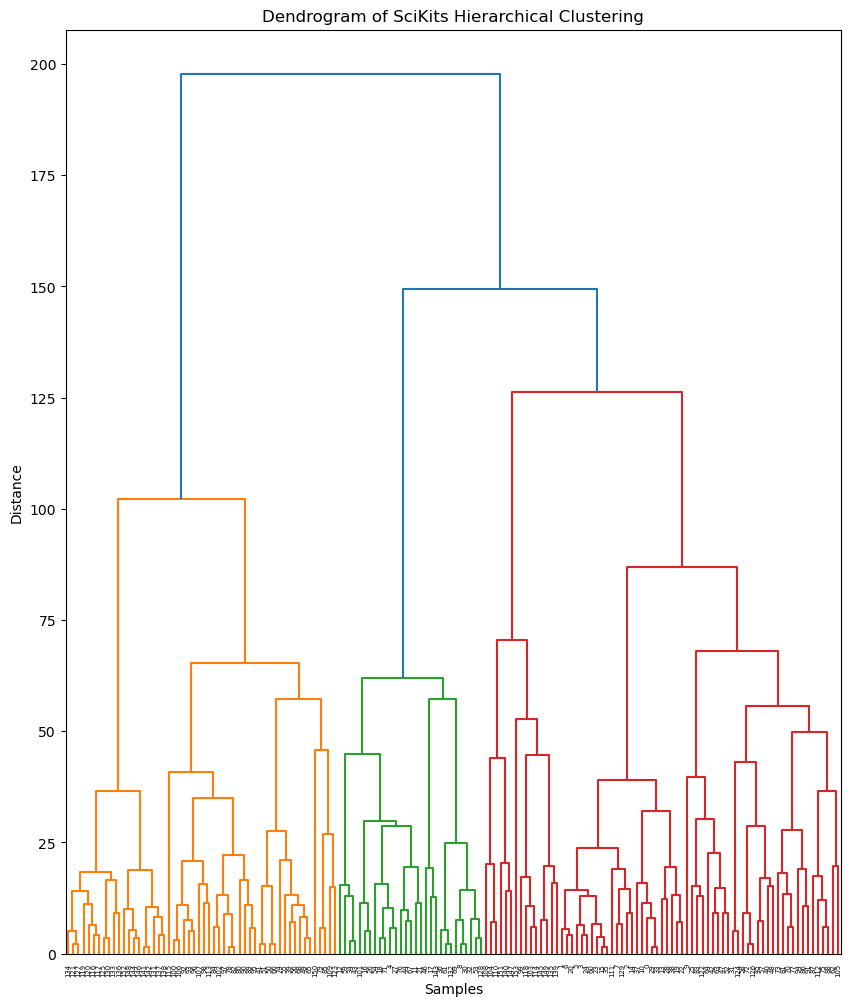

In [186]:
SKclusters.fit(data)
Z = linkage(SKclusters.children_, method='average')
plt.figure(figsize=(10, 12))
dendrogram(Z)
plt.title('Dendrogram of SciKits Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Our Implementation:

In [187]:
def euclideanDistance(x, y):
    return np.sqrt(np.sum(np.power(x - y, 2)))

def distanceMatrix (data):
    n = data.shape[0]
    distMatrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1, n):
            distMatrix[i,j] = euclideanDistance(data[i], data[j])
            distMatrix[j,i] = distMatrix[i,j]
    return distMatrix

def heirarichalClustering (data, clusterNum):
    # Number of samples
    n = data.shape[0]
    # Creates distance matrix
    dist_matrix = distanceMatrix(data)
    # print(dist_matrix)
    # Places each data point into it's own cluster
    clusters = [[i] for i in range(n)]
    # Repeats until you have reduced from #sample clusters to #specified clusters
    while len(clusters) > clusterNum:
        # Finds closest clusters
        min = np.inf
        for i in range(len(clusters)):
            for j in range(i+1, len(clusters)):
                dist = np.mean([dist_matrix[a,b] for a in clusters[i] for b in clusters[j]])
                if dist < min:
                    min = dist
                    merged = (i, j)

        # Merge the two closest clusters
        clusters[merged[0]] += clusters[merged[1]]
        del clusters[merged[1]]
    return clusters

In [188]:
# Format of the output
# index of cluster being merged - index of cluster being merged - distance between the two clusters - size of new merged cluster

def singleLinkage(data):
    distMatrix = distanceMatrix(data)
    numSamples = distMatrix.shape[0]
    Z = np.zeros((numSamples-1, 4))
    clusters = [[i] for i in range(numSamples)]

    for samples in range(numSamples-1):
        # Finds closest clusters
        min = 1000000
        for i in range(len(clusters)):
            for j in range(i+1, len(clusters)):
                dist = np.mean([distMatrix[a,b] for a in clusters[i] for b in clusters[j]])
                if dist < min:
                    min = dist
                    merged = (i, j)

        # Merge the two closest clusters
        Z[i, 0] = clusters[merged[0]]
        Z[i, 1] = clusters[merged[0]]
        clusters[merged[0]] += clusters[merged[1]]
        del clusters[merged[1]]
        samples += 1
    return Z

    # # Loop over each step of the algorithm
    # for i in range(numSamples-1):
    #     # Find the closest pair of clusters
    #     min_dist = np.inf
    #     for j in range(len(clusters)):
    #         for k in range(i+1, len(clusters)):
    #             dist = np.mean([distMatrix[a,b] for a in clusters[i] for b in clusters[j]])
    #             if dist < min_dist:
    #                 min_dist = distMatrix[clusters[j], clusters[k]]
    #                 min_index = (j, k)

    #     # Merge the two closest clusters
    #     cluster1 = clusters[min_index[0]]
    #     cluster2 = clusters[min_index[1]]
    #     clusters.remove(cluster1)
    #     clusters[min_index[1]-1] = i + numSamples
    #     # print(Z)
    #     # Z[i] = [cluster1, cluster2, min_dist, len(clusters)]
    #     Z[i, 0] = cluster1[0]
    #     Z[i, 1] = cluster2[0]
    #     Z[i, 2] = min_dist
    #     Z[i, 3] = len(clusters)

    # return Z

In [191]:
clusters = heirarichalClustering(data, clusterNum)
clusterDict = {"0":[], "1":[], "2":[], "3":[]}
for i in range(len(clusters)):
    label = str(i)
    clusterDict[label] = clusters[i]
# print(clusterDict)

clusterLabelList = []
for i in range(len(data)):
    for j in clusterDict: 
        for k in clusterDict[j]: #-->154
            if k == i:
                clusterLabelList.append(int(j))
print(clusterLabelList)

distMatrix = distanceMatrix(data)
# orange - cluster 3/2, green - cluster 0, red - cluster 1, 
# singleLinkage(data)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


/var/folders/48/58h9_x896ts52nyqt295ln440000gn/T/ipykernel_7216/4035769224.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distMatrix, method='average')


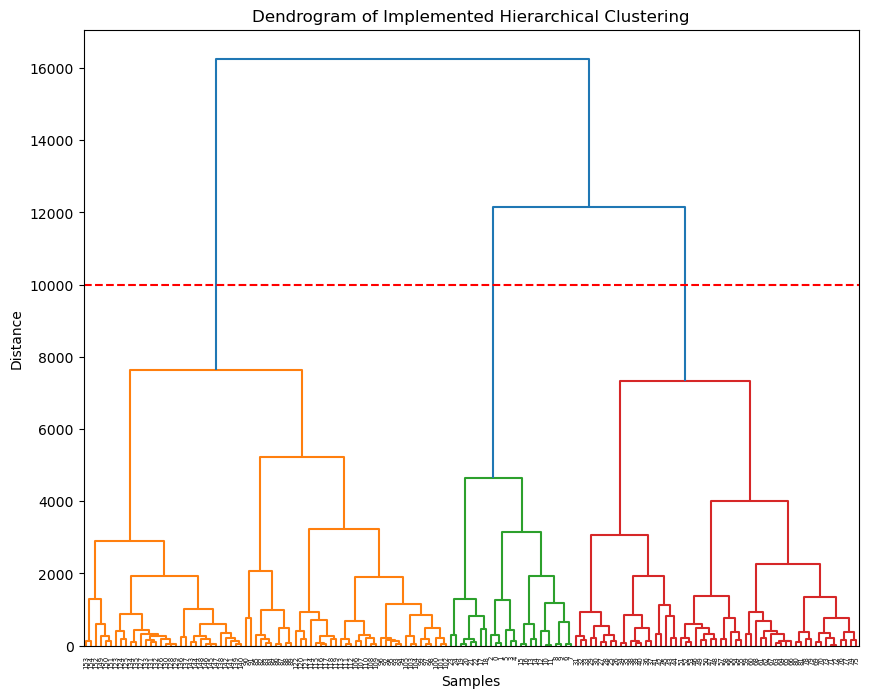

In [192]:
Z = linkage(distMatrix, method='average')
# Z = singleLinkage(data)
plt.figure(figsize=(10, 8))
dendrogram(Z)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.title('Dendrogram of Implemented Hierarchical Clustering')
plt.axhline(y=10000, color='r', linestyle='--')
plt.show()